In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.model_selection import train_test_split

In [20]:
# Read data from cement concrete.csv and look the headers
#alat = pd.read_csv('./data/pero.csv',header=0, index_col = 0, usecols= ['ra','rb','xa','xb','za','a','b','c'])
alat = pd.read_csv('./data/pero.csv')
alat.head()

,sn,compound,ra,rb,xa,xb,za,a,b,c
0,1,BaCeO3,1.35,0.87,0.89,1.12,2.0,6.2350,8.7810,6.2120
1,2,BaPrO3,1.35,0.85,0.89,1.13,2.0,6.2140,8.7220,6.1810
2,3,BaPuO3,1.35,0.86,0.89,1.30,2.0,6.1930,8.7440,6.2190
3,4,CaCrO3,1.00,0.55,1.00,1.66,2.0,5.3160,7.4860,5.2870
4,5,CaGeO3,1.00,0.53,1.00,2.01,2.0,5.2688,7.4452,5.2607


In [21]:
# Information of concrete DataFrame
alat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sn        100 non-null    int64  
 1   compound  100 non-null    object 
 2   ra        100 non-null    float64
 3   rb        100 non-null    float64
 4   xa        100 non-null    float64
 5   xb        100 non-null    float64
 6   za        100 non-null    float64
 7   a         100 non-null    float64
 8   b         100 non-null    float64
 9   c         100 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 7.9+ KB


In [22]:
# extract the required data columns only for training purpose (features and target)
import numpy as np
features = np.array(alat[['ra','rb','xa','xb','za']], np.float64)
#targets = np.array(alat[['a', 'b', 'c']], np.float64)
targets = np.array(alat[['a']], np.float64) # one target at a time

In [23]:
# Normalization of data between -1 to 1
max_ = features.max(axis=0)
min_ = features.min(axis=0)
features = (features - min_) / (max_ - min_)
targets = (targets - min_) / (max_ - min_)

In [24]:
# Create training and validation splits
X_train, X_valid, y_train, y_valid = train_test_split(features, targets,
                                                    random_state=11117,
                                                    test_size=0.2)

In [25]:
# Early stopping criteria
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=300, # how many epochs to wait before stopping
    restore_best_weights=True,
)

In [26]:
# Build a Sequential Model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[5]), # Input layer
    layers.Dense(64, activation='relu'), # 1st hidden layer
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'), # 2nd hidden layer
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'), # 3rd hidden layer
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'), # 4th hidden layer
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'), # 5th hidden layer
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'), # 6th hidden layer
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'), # 7th hidden layer
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu'), # one hidden layer
    layers.Dense(1), # output layer
])

In [27]:
# Compile model
model.compile(optimizer='adam', loss='mae',)

In [28]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=2500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,
)

Epoch 1/2500
2/2 [==============================] - 3s 390ms/step - loss: 5.2983 - val_loss: 5.1902
Epoch 2/2500
2/2 [==============================] - 0s 46ms/step - loss: 5.1279 - val_loss: 5.1775
Epoch 3/2500
2/2 [==============================] - 0s 45ms/step - loss: 5.0429 - val_loss: 5.1585
Epoch 4/2500
2/2 [==============================] - 0s 45ms/step - loss: 5.0167 - val_loss: 5.1351
Epoch 5/2500
2/2 [==============================] - 0s 45ms/step - loss: 4.8608 - val_loss: 5.1085
Epoch 6/2500
2/2 [==============================] - 0s 45ms/step - loss: 4.8278 - val_loss: 5.0764
Epoch 7/2500
2/2 [==============================] - 0s 45ms/step - loss: 4.6163 - val_loss: 5.0448
Epoch 8/2500
2/2 [==============================] - 0s 45ms/step - loss: 4.5119 - val_loss: 5.0120
Epoch 9/2500
2/2 [==============================] - 0s 45ms/step - loss: 4.4179 - val_loss: 4.9773
Epoch 10/2500
2/2 [==============================] - 0s 45ms/step - loss: 4.3343 - val_loss: 4.9377
Epoch 11

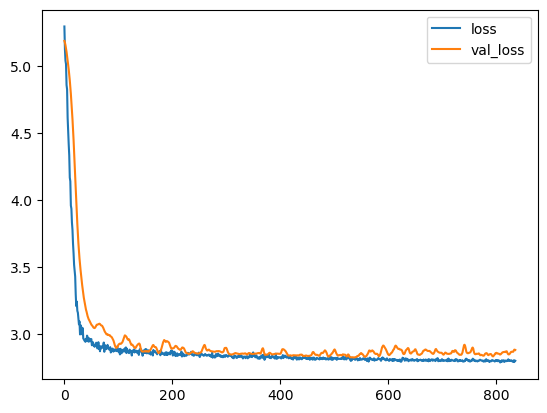

In [29]:
# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

In [31]:
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

Minimum validation loss: 2.823979616165161
